# Heart Failure Prediction 

## Import Libraries

In [1]:
%pip install xgboost
%pip install -U seaborn
%pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing the required libraries for visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Data Retrieving
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Extract Descriptive Data.
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,60.83,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,11.89,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,95.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00


0    203
1     96
Name: death_event, dtype: int64


<AxesSubplot:title={'center':'Alive vs Deceased Patients'}>

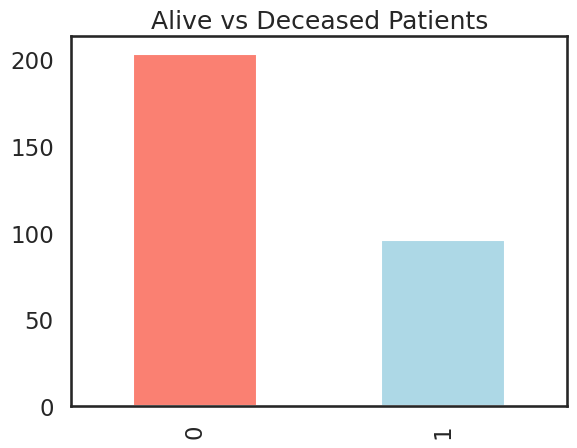

In [35]:
#Viewing the status of people in the data set : 
print(data.death_event.value_counts())
data.death_event.value_counts().plot(kind="bar", color=["salmon", "lightblue"], title = 'Alive vs Deceased Patients')

In [5]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [33]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
death_event                   int64
dtype: object

## Data Cleanup

In [7]:
#rename DEATH_EVENT column to keep consistency with other columns
data.rename(columns={'DEATH_EVENT': 'death_event'}, inplace=True)
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
death_event                   int64
dtype: object

In [8]:
# Categorical and Numerical Continious Features
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

print('==============================')
print(f"Categorical Features : {categorical_val}")
print(f"Continous Features : {continous_val}")

age : [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
anaemia : [0 1]
creatinine_phosphokinase : [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  910   72  130 2334

## Exploratory Data Analysis

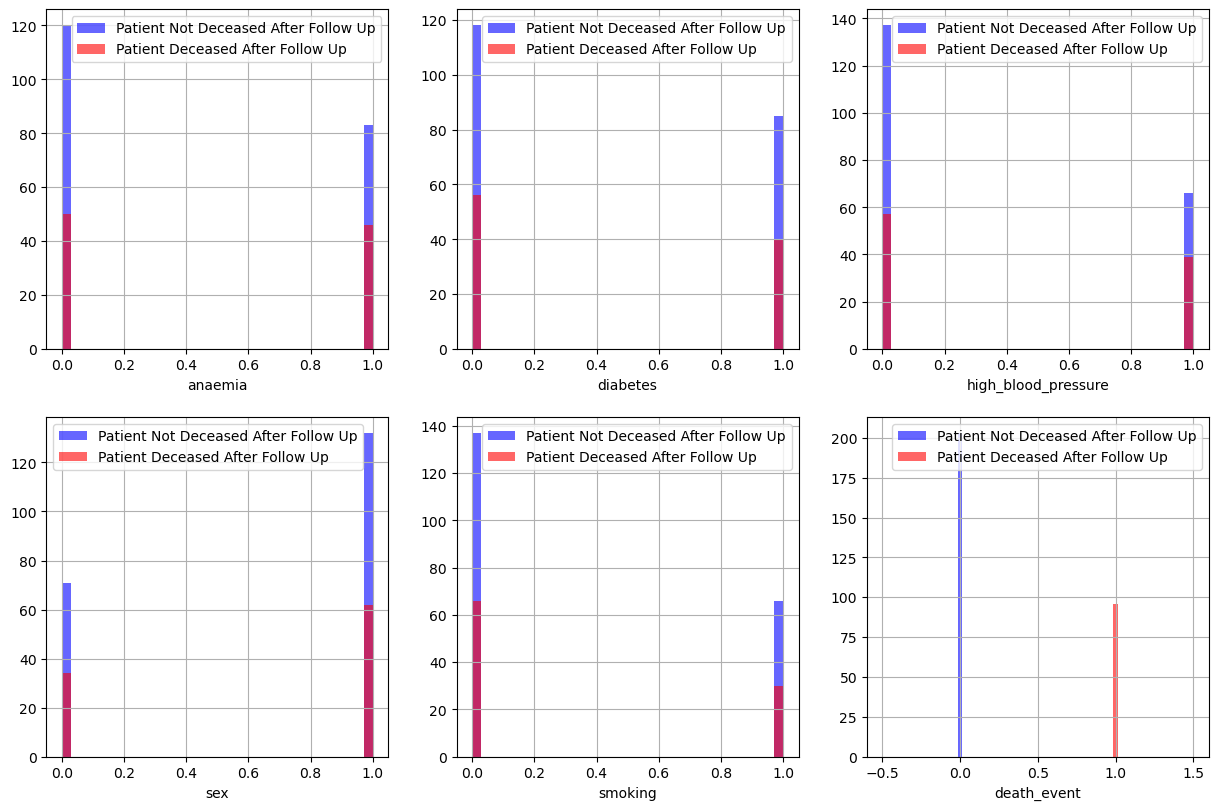

In [9]:
#Study of the relationship of categorical features and heart disease:

plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["death_event"] == 0][column].hist(bins=35, color='blue', label='Patient Not Deceased After Follow Up', alpha=0.6)
    data[data["death_event"] == 1][column].hist(bins=35, color='red', label='Patient Deceased After Follow Up', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

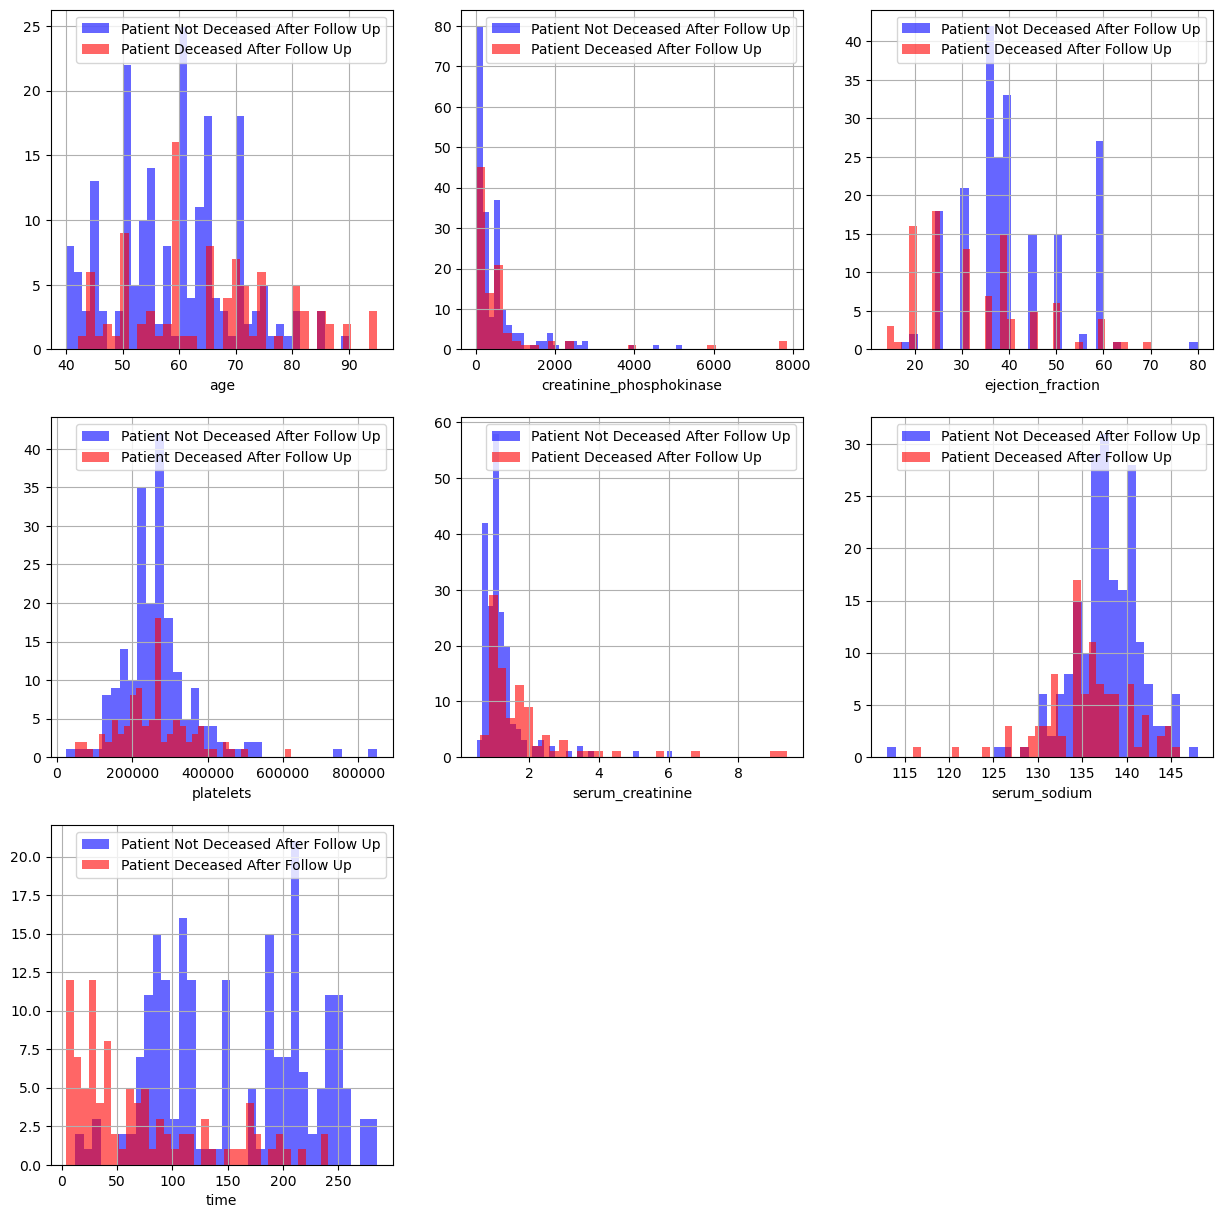

In [10]:
#Study of the relationship of continuous features and heart disease:

plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    data[data["death_event"] == 0][column].hist(bins=35, color='blue', label='Patient Not Deceased After Follow Up', alpha=0.6)
    data[data["death_event"] == 1][column].hist(bins=35, color='red', label='Patient Deceased After Follow Up', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

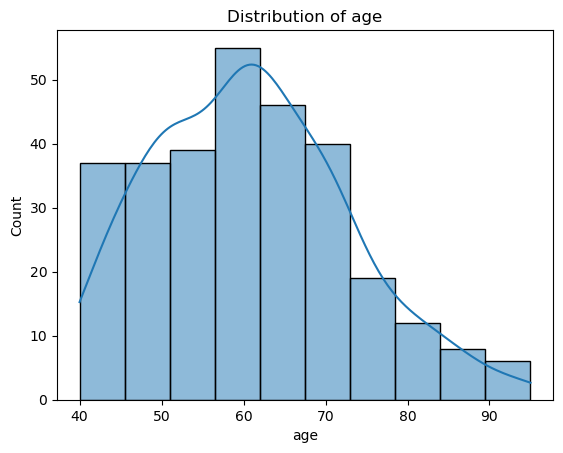

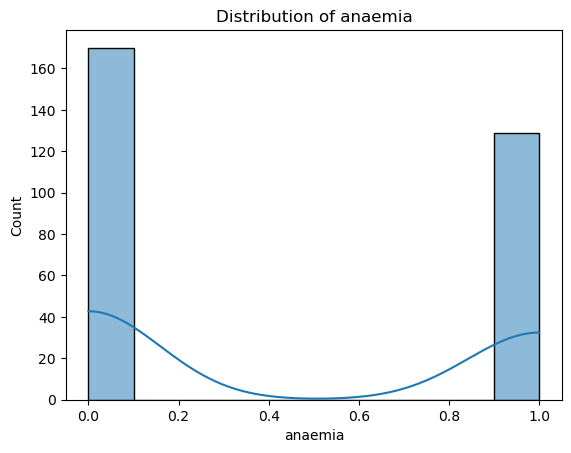

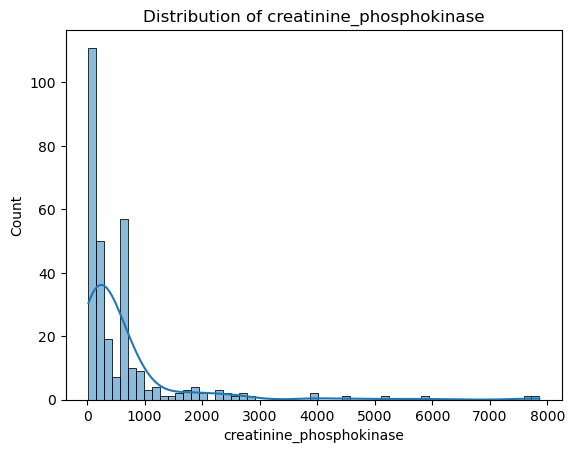

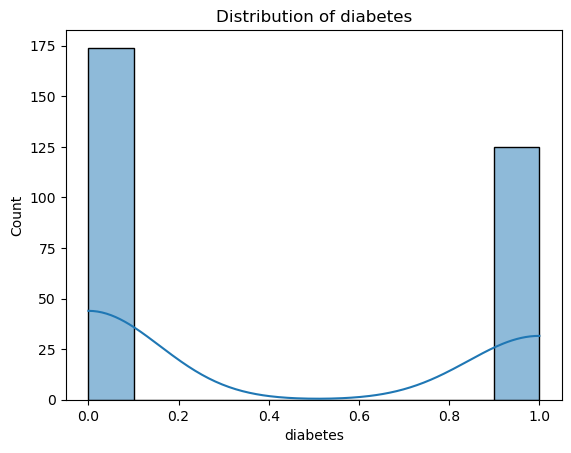

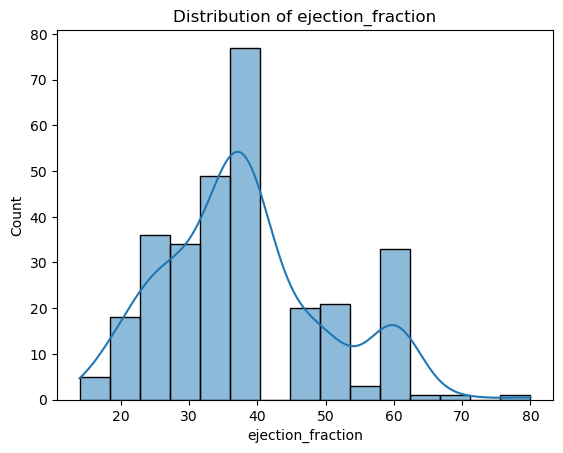

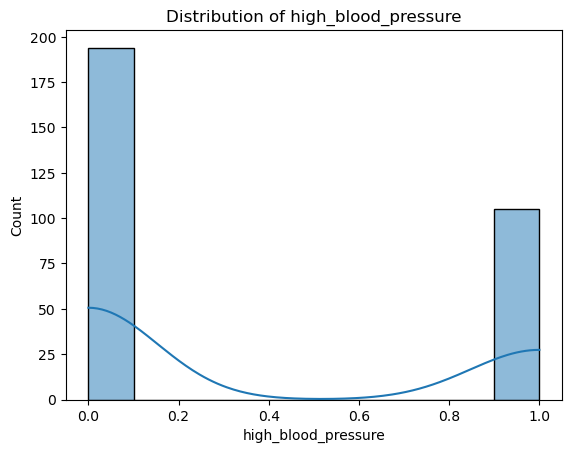

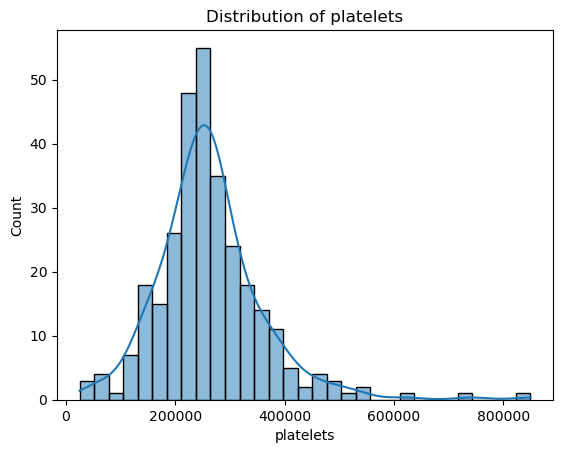

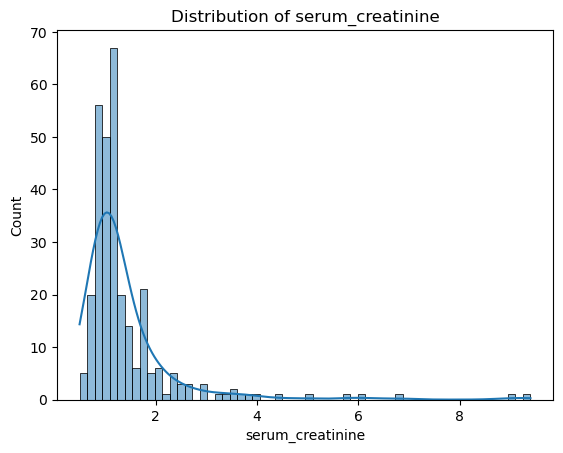

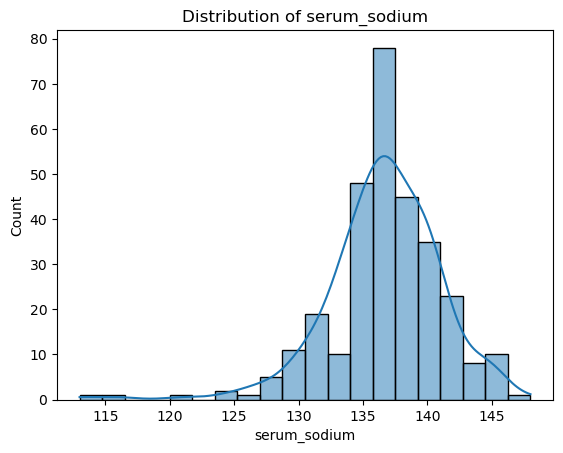

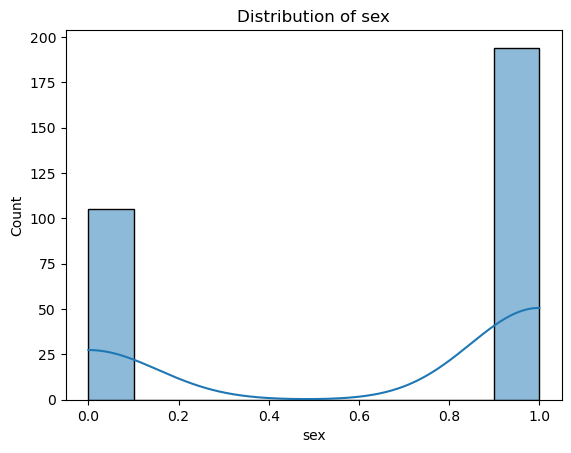

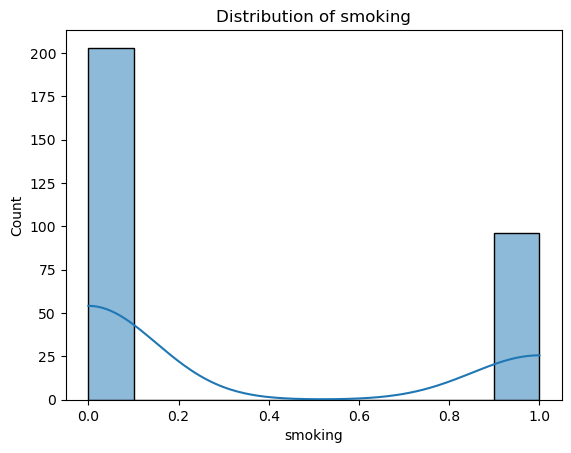

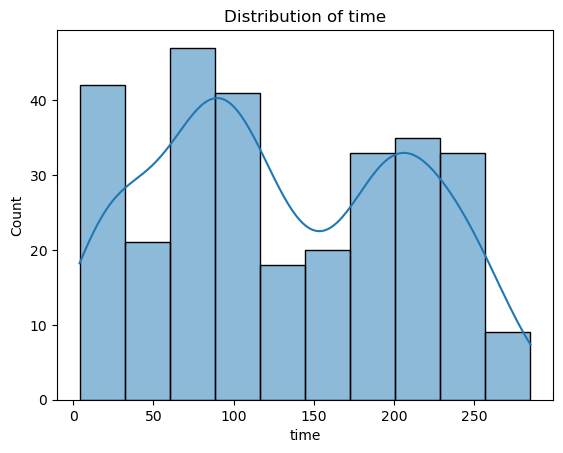

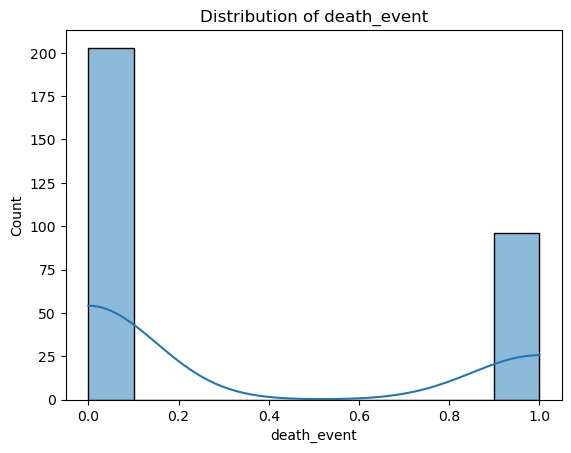

In [11]:
# Distribution of numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

(13.5, -0.5)

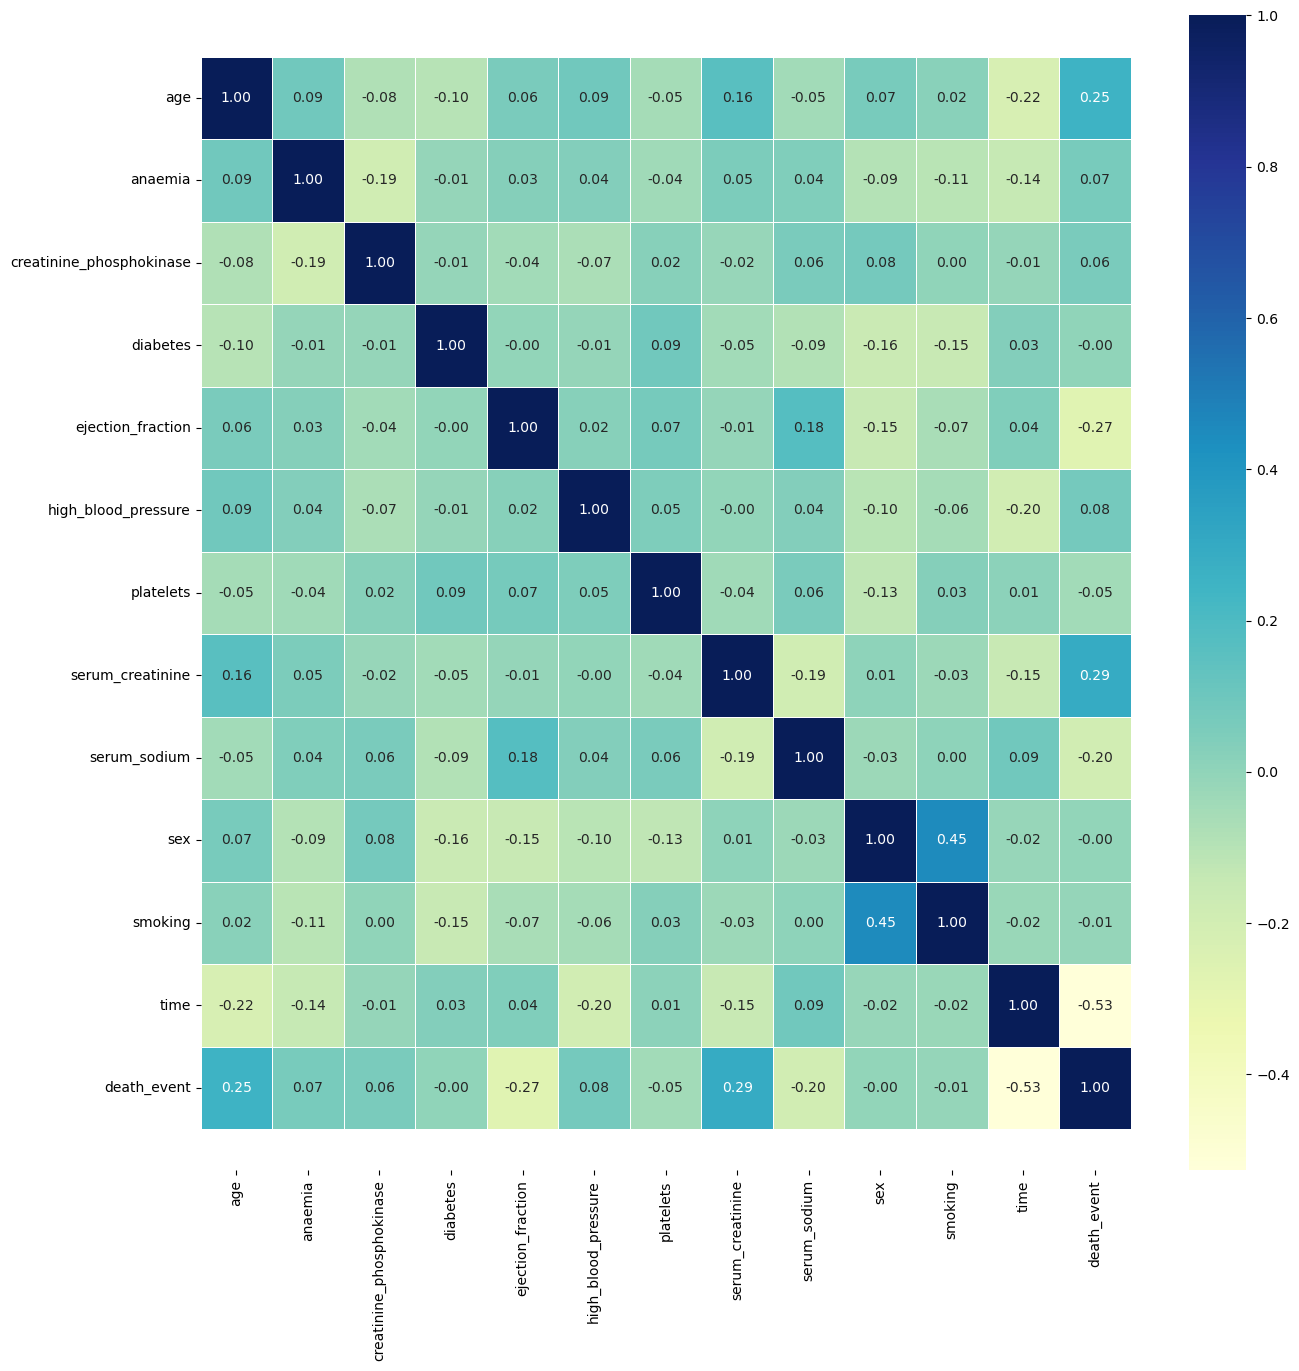

In [12]:
# Studying the correlations between features using Heat Map!
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with death_event'}>

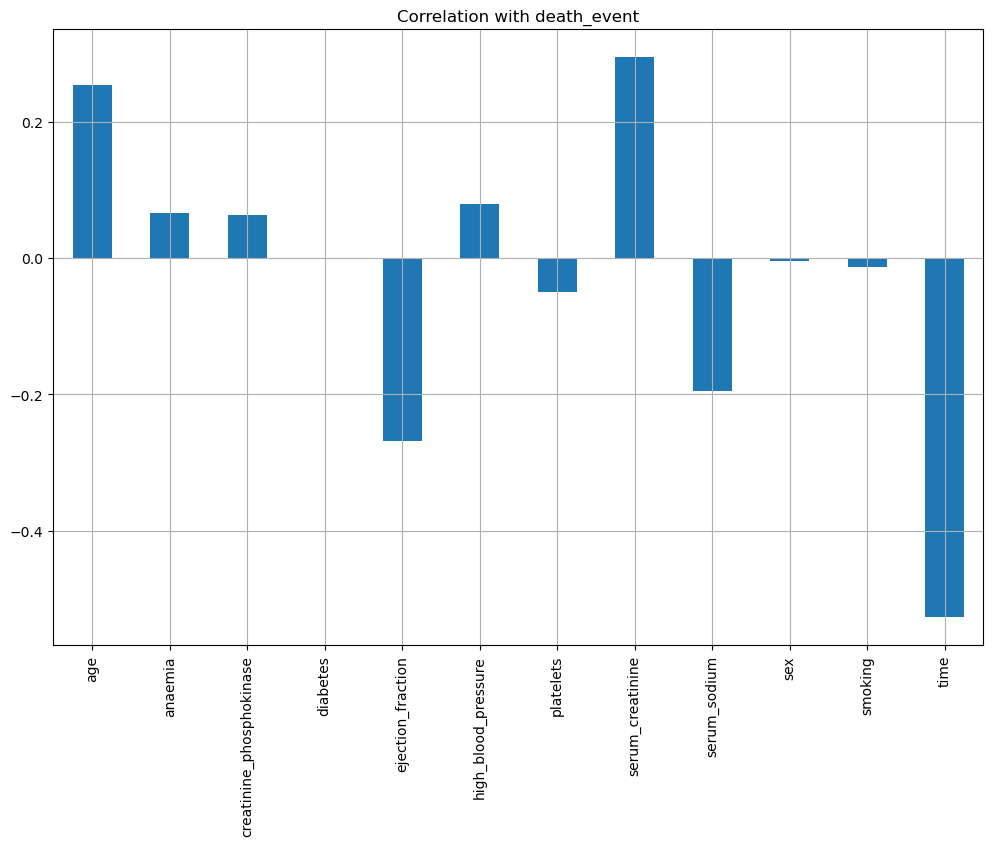

In [13]:
data.drop('death_event', axis=1).corrwith(data.death_event).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with death_event")

## Machine Learning Models

### 1 - Logistic Regression Algorithm

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
feature_cols = [col_name for col_name in data.columns if col_name != 'death_event']

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.death_event))
# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'death_event']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'death_event']

In [15]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_pred_0 = lr.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_0, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.81,0.76,0.80,0.79,0.80
recall,0.92,0.55,0.80,0.73,0.80
f1-score,0.86,0.64,0.80,0.75,0.79
support,61.00,29.00,0.80,90.00,90.00


In [16]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)
y_pred_1 = lr_l1.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_1, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.84,0.78,0.82,0.81,0.82
recall,0.92,0.62,0.82,0.77,0.82
f1-score,0.88,0.69,0.82,0.78,0.82
support,61.00,29.00,0.82,90.00,90.00


In [17]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
y_pred_2 = lr_l2.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, y_pred_2, output_dict=True))
clf_report

,0,1,accuracy,macro avg,weighted avg
precision,0.80,0.79,0.80,0.80,0.80
recall,0.93,0.52,0.80,0.73,0.80
f1-score,0.86,0.62,0.80,0.74,0.79
support,61.00,29.00,0.80,90.00,90.00


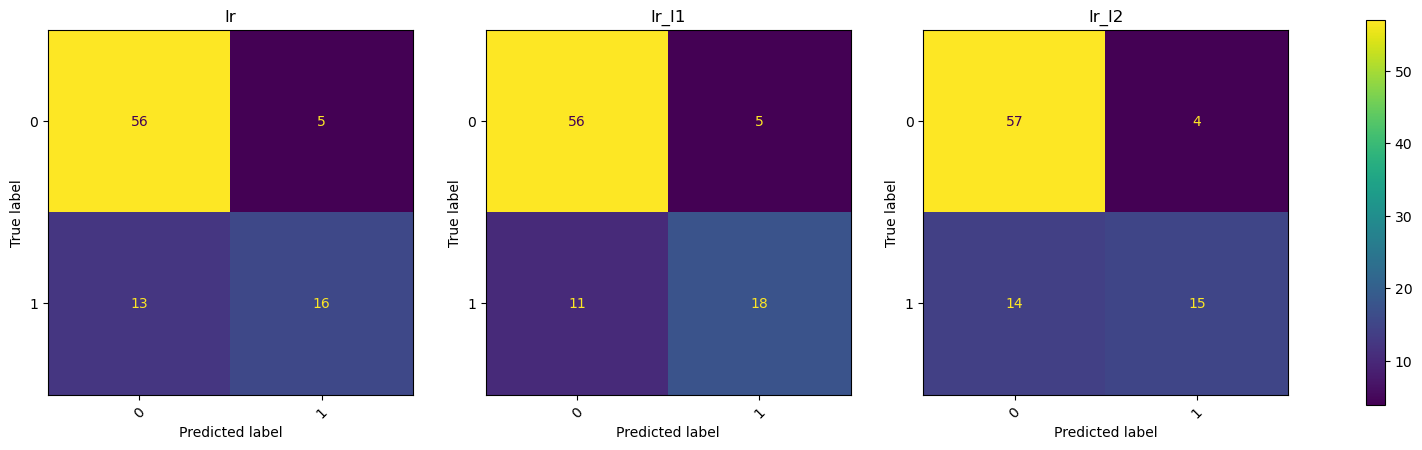

In [18]:
classifiers = {
    "lr": lr,
    "lr_l1": lr_l1,
    "lr_l2": lr_l2

}

f, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.grid(False)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()

f.colorbar(disp.im_, ax=axes)
plt.show()

## 2. K-Nearest Neighbor

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, ConfusionMatrixDisplay

In [20]:
### BEGIN SOLUTION
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

# Get minimum error id 
min_error_id = error_results['Error Rate'].idxmin()

# Get Best K 
error_results.loc[min_error_id]

K            19.00
Error Rate    0.36
Name: 18, dtype: float64

In [21]:
knn = KNeighborsClassifier(n_neighbors=25, weights='distance')
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

KNN_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
KNN_report

,0,1,accuracy,macro avg,weighted avg
precision,0.69,0.38,0.64,0.54,0.59
recall,0.87,0.17,0.64,0.52,0.64
f1-score,0.77,0.24,0.64,0.50,0.60
support,61.00,29.00,0.64,90.00,90.00


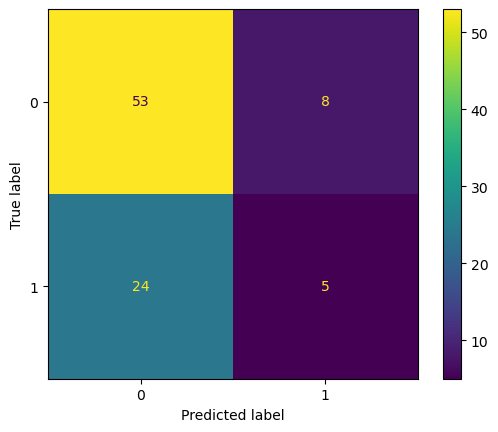

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

## 3 - XGBoost Algorithm

In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [5],
    "learning_rate": [0.05],
    "gamma": [0, 0.25, 1, 10],
    "reg_lambda": [0],
    "scale_pos_weight": [1, 3, 5, 7, 10],
    "subsample": [0.1,0.2, 0.3, 0.4, 0.5, 0.8],
    "colsample_bytree": [0.5,0.7],
}


# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [24]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 5,
 'reg_lambda': 0,
 'scale_pos_weight': 3,
 'subsample': 0.2}

In [25]:
final_xgb_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic",
)

_ = final_xgb_cl.fit(X_train, y_train)

y_pred = final_xgb_cl.predict(X_test)

xgb_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
xgb_report

,0,1,accuracy,macro avg,weighted avg
precision,0.85,0.83,0.84,0.84,0.84
recall,0.93,0.66,0.84,0.79,0.84
f1-score,0.89,0.73,0.84,0.81,0.84
support,61.00,29.00,0.84,90.00,90.00


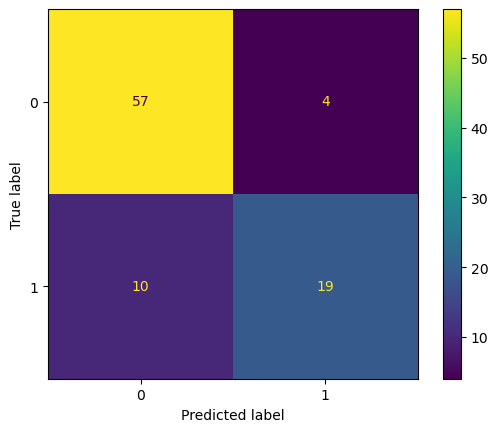

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=final_xgb_cl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_xgb_cl.classes_)
disp.plot()
plt.grid(False)
plt.show()

## 4. Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfm = RandomForestClassifier(oob_score=True, n_estimators=100, max_depth=4, min_samples_split=2, random_state=42)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    rfm.set_params(n_estimators=n_trees)

    # Fit the model
    rfm.fit(X_train, y_train)

    # Get the oob error (Out-of-bag Error)
    oob_error = 1 - rfm.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
rf_oob_df


,oob
n_trees,
15.00,0.18
20.00,0.18
30.00,0.18
40.00,0.17
50.00,0.18
100.00,0.14
150.00,0.15
200.00,0.15
300.00,0.14


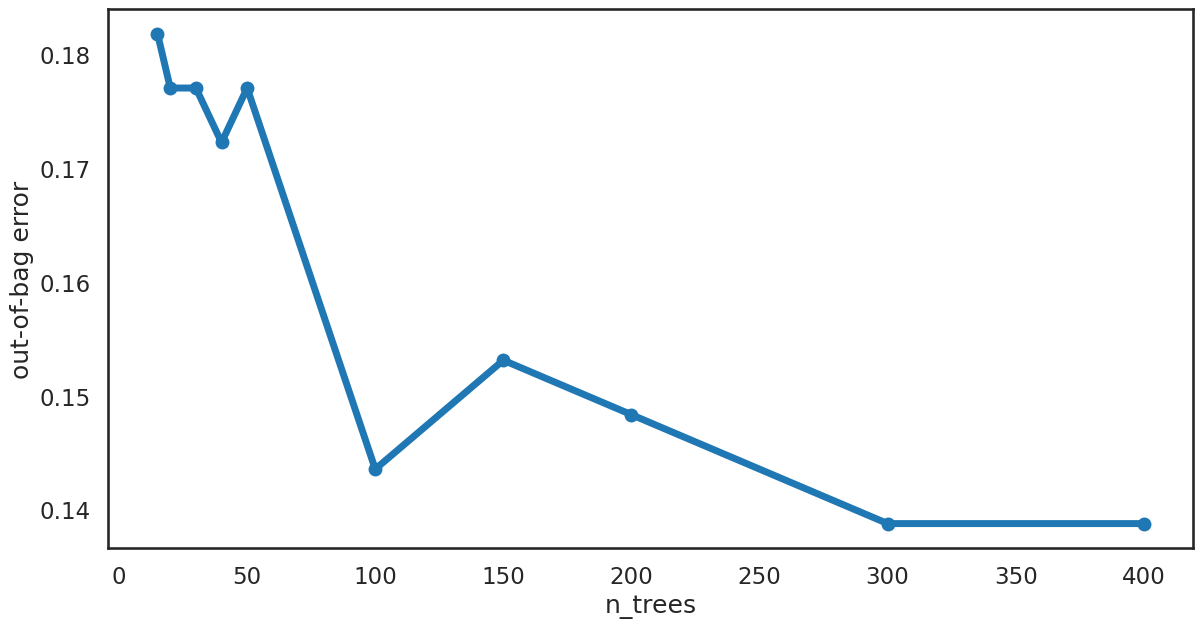

In [29]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [30]:
# Random forest with 100 estimators
rfm = rfm.set_params(n_estimators=100)

y_pred = rfm.predict(X_test)

In [31]:
rfm_report = pd.DataFrame(classification_report(y_test, y_pred_0, output_dict=True))
rfm_report

,0,1,accuracy,macro avg,weighted avg
precision,0.81,0.76,0.80,0.79,0.80
recall,0.92,0.55,0.80,0.73,0.80
f1-score,0.86,0.64,0.80,0.75,0.79
support,61.00,29.00,0.80,90.00,90.00


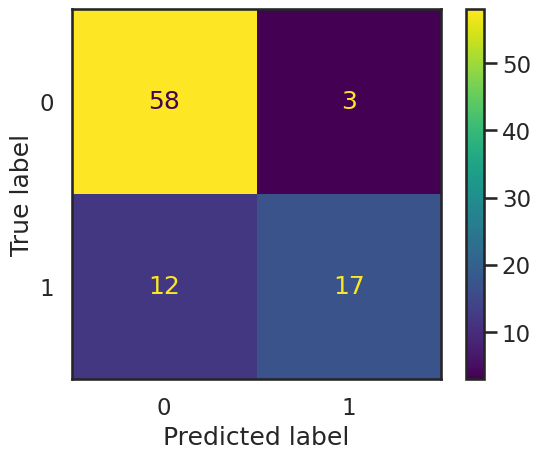

In [32]:
cm = confusion_matrix(y_test, y_pred, labels=rfm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfm.classes_)
disp.plot()
plt.grid(False)
plt.show()